In [1]:
import os
os.environ["PYTHONWARNINGS"] = "ignore"

In [2]:
import warnings
warnings.filterwarnings("ignore")

In [3]:
import scanpy as sc
import squidpy as sq

In [4]:
# set working directory
project_dir = "/Users/cenkcelik/Cenk_scoring/"
working_dir = project_dir + ""
os.chdir(working_dir)

# set figure directory
figure_dir = working_dir + "figures/"

# processed data directory
processed_data = working_dir + "processed_data/"

In [5]:
# import a local package
import sys
sys.path.append("/Users/cenkcelik/Documents/GitHub/EnrichMap/")
import enrichmap as em

In [6]:
adata = sq.datasets.merfish()

In [7]:
adata

AnnData object with n_obs × n_vars = 73655 × 161
    obs: 'Cell_ID', 'Animal_ID', 'Animal_sex', 'Behavior', 'Bregma', 'Centroid_X', 'Centroid_Y', 'Cell_class', 'Neuron_cluster_ID', 'batch'
    uns: 'Cell_class_colors'
    obsm: 'spatial', 'spatial3d'

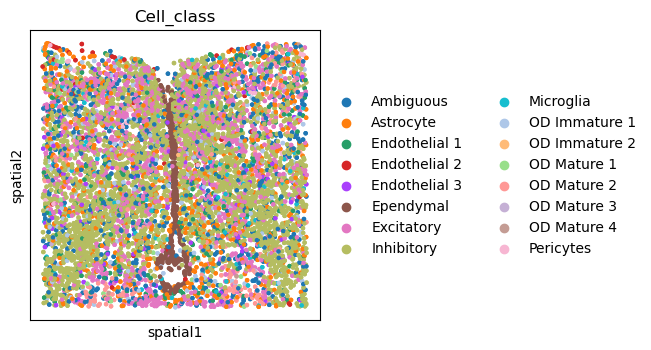

In [15]:
sq.pl.spatial_scatter(
    adata[adata.obs.Bregma == -9],
    shape=None,
    color="Cell_class",
    size=20,
    vcenter=0,
    save="merfish_cell_class.pdf"
)

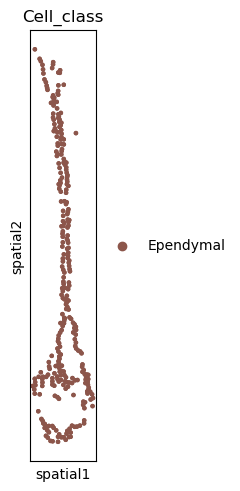

In [16]:
sq.pl.spatial_scatter(
    adata[adata.obs.Bregma == -9],
    shape=None,
    color="Cell_class",
    groups=["Ependymal"],
    size=20,
    vcenter=0,
    save="merfish_ependymal.pdf"
)

In [10]:
sc.pp.normalize_total(adata, target_sum=1e4)
sc.pp.log1p(adata)

In [11]:
# Perform DEGs for each cluster
sc.tl.rank_genes_groups(adata, groupby="Cell_class", method="wilcoxon")
sc.tl.filter_rank_genes_groups(adata, min_in_group_fraction=0.5, min_fold_change=2, max_out_group_fraction=0.5)

gene_list = adata.uns["rank_genes_groups"]["names"]["Ependymal"][:50].tolist()

In [12]:
em.tl.score(
    adata,
    gene_set=gene_list,
    smoothing=True,
    correct_spatial_covariates=True,
    batch_key=None
)

Scoring signatures: 100%|██████████| 1/1 [00:01<00:00,  1.80s/it]


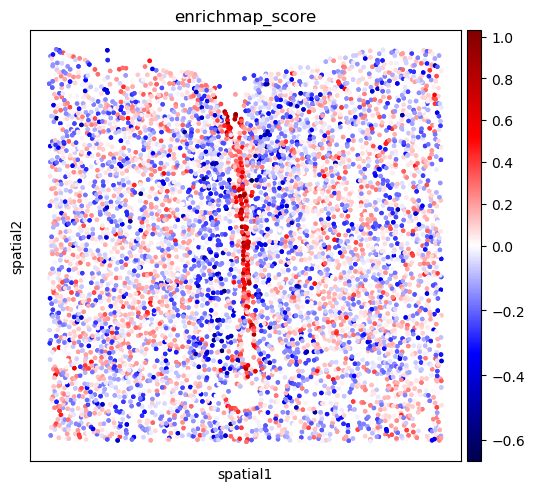

In [18]:
sq.pl.spatial_scatter(
    adata[adata.obs.Bregma == -9],
    shape=None,
    color=["enrichmap_score"],
    size=20,
    vcenter=0,
    cmap="seismic",
    save="merfish_enrichmap_score.pdf",
)